# Exploratory Data Analysis on Austin Animal Shelter Outcomes

## Table of Contents: 
 
   * [General Information](#general-information) 
   <br/><br/> 
   * [Outcome Type & Subtype](#outcome-type+subtype) 
   <br/><br/> 
   * [Aged Animals](#aged-animals) 
   <br/><br/> 
   * [Animals Returned](#animals-returned) 
   <br/><br/> 
   * [Location & Time](#location+time) 
   <br/><br/> 
   

## General Information $\;\;\;\;\;\;$ <a class="anchor" id="general-information"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Outcomes.csv')
new_df = df.copy() # New dataframe on which feature engineering apply 

In [3]:
df.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A794011,Chunk,05/08/2019 06:20:00 PM,05/08/2019 06:20:00 PM,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
1,A776359,Gizmo,07/18/2018 04:02:00 PM,07/18/2018 04:02:00 PM,07/12/2017,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
2,A821648,NaN,08/16/2020 11:38:00 AM,08/16/2020 11:38:00 AM,08/16/2019,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray
3,A720371,Moose,02/13/2016 05:59:00 PM,02/13/2016 05:59:00 PM,10/08/2015,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
4,A674754,NaN,03/18/2014 11:47:00 AM,03/18/2014 11:47:00 AM,03/12/2014,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124491 entries, 0 to 124490
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         124491 non-null  object
 1   Name              85466 non-null   object
 2   DateTime          124491 non-null  object
 3   MonthYear         124491 non-null  object
 4   Date of Birth     124491 non-null  object
 5   Outcome Type      124471 non-null  object
 6   Outcome Subtype   57308 non-null   object
 7   Animal Type       124491 non-null  object
 8   Sex upon Outcome  124490 non-null  object
 9   Age upon Outcome  124486 non-null  object
 10  Breed             124491 non-null  object
 11  Color             124491 non-null  object
dtypes: object(12)
memory usage: 11.4+ MB


In [5]:
df.describe()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
count,124491,85466,124491,124491,124491,124471,57308,124491,124490,124486,124491,124491
unique,111309,19781,102921,102921,7100,9,23,5,5,52,2633,598
top,A721033,Max,04/18/2016 12:00:00 AM,04/18/2016 12:00:00 AM,04/21/2014,Adoption,Partner,Dog,Neutered Male,1 year,Domestic Shorthair Mix,Black/White
freq,33,561,39,39,117,55347,30811,70516,43794,22130,31331,13070


In [6]:
df['Outcome Type'].unique()

array(['Rto-Adopt', 'Adoption', 'Euthanasia', 'Transfer',
       'Return to Owner', 'Died', 'Disposal', 'Missing', 'Relocate', nan],
      dtype=object)

In [7]:
df['Outcome Subtype'].unique()

array([nan, 'Partner', 'Foster', 'SCRP', 'Suffering', 'Underage', 'Snr',
       'Rabies Risk', 'In Kennel', 'Offsite', 'Aggressive', 'Enroute',
       'At Vet', 'In Foster', 'Behavior', 'Medical', 'Field',
       'Possible Theft', 'Barn', 'Customer S', 'Court/Investigation',
       'Emer', 'In Surgery', 'Prc'], dtype=object)

Dog          70516
Cat          46762
Other         6608
Bird           585
Livestock       20
Name: Animal Type, dtype: int64


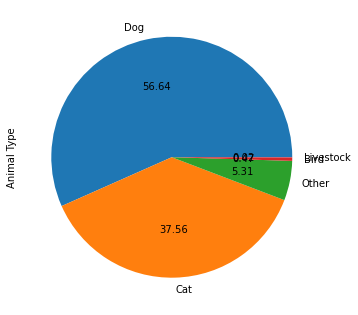

In [8]:
print(df['Animal Type'].value_counts())
plt.figure(figsize=(5,5))
df['Animal Type'].value_counts().plot.pie(autopct='%.2f')
plt.tight_layout()

## Outcome Type & Subtype$\;\;\;\;\;\;$ <a class="anchor" id="outcome-type+subtype"></a>

In [9]:
df['Animal ID'].nunique()

111309

<AxesSubplot:xlabel='Outcome Type', ylabel='count'>

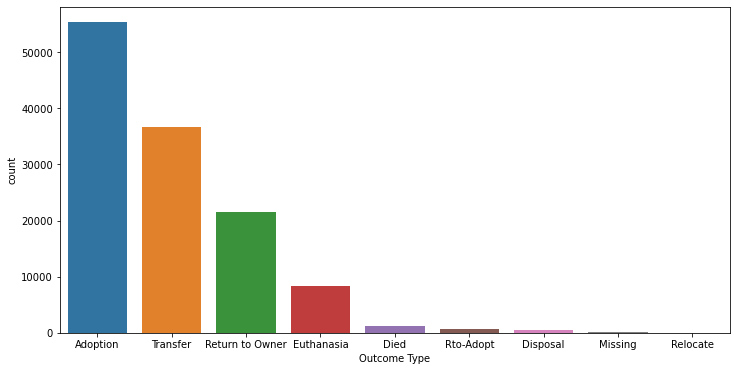

In [10]:
plt.figure(figsize=(12,6))
sns.countplot(x=df['Outcome Type'], order=df['Outcome Type'].value_counts().index)

In [11]:
df[df['Animal Type']=='Other']['Breed'].unique()

array(['Raccoon', 'Opossum', 'Bat Mix', 'Bat', 'Polish', 'Guinea Pig Mix',
       'Rabbit Sh Mix', 'Raccoon Mix', 'Ferret Mix', 'Guinea Pig',
       'Chinchilla', 'Fox Mix', 'Rabbit Sh', 'Snake Mix', 'Hamster',
       'Squirrel Mix', 'Fox', 'Skunk', 'Ringtail Mix', 'Californian Mix',
       'Opossum Mix', 'Skunk Mix', 'Lionhead Mix', 'Dutch Mix', 'Rat Mix',
       'Mouse Mix', 'Lizard', 'Angora-French Mix', 'Chinchilla Mix',
       'Lizard Mix', 'Cold Water', 'Lop-Holland', 'Hamster Mix',
       'Angora-Satin', 'Rat', 'Ferret', 'Rex Mix', 'Rhinelander Mix',
       'Havana Mix', 'New Zealand Wht Mix', 'Cold Water Mix',
       'Netherlnd Dwarf', 'Lionhead', 'Tortoise Mix', 'Lop-English Mix',
       'Snake/Python', 'Lop-Holland Mix', 'Squirrel', 'English Spot Mix',
       'Rabbit Lh Mix', 'Armadillo Mix', 'Rabbit Lh', 'Californian',
       'English Spot', 'Turtle Mix', 'Cinnamon', 'Rex', 'Mouse', 'Snake',
       'Turtle', 'Coyote Mix', 'Hedgehog', 'Gerbil', 'Armadillo',
       'Angora-Sat

In [12]:
df.groupby(['Outcome Type','Outcome Subtype']).count()['Animal ID']

Outcome Type     Outcome Subtype    
Adoption         Barn                       3
                 Foster                 10899
                 Offsite                  383
Died             At Vet                    88
                 Enroute                   84
                 In Foster                272
                 In Kennel                581
                 In Surgery                22
Euthanasia       Aggressive               539
                 At Vet                   167
                 Behavior                 159
                 Court/Investigation       29
                 Medical                  303
                 Rabies Risk             3682
                 Suffering               3237
                 Underage                  36
Missing          In Foster                 23
                 In Kennel                 15
                 Possible Theft            16
Return to Owner  At Vet                     1
                 Customer S                

## Aged Animals

In [31]:
df['Age upon Outcome'].unique()

array(['2 years', '1 year', '4 months', '6 days', '7 years', '2 months',
       '2 days', '3 weeks', '9 months', '4 weeks', '2 weeks', '3 months',
       '9 years', '10 years', '6 months', '8 years', '3 years',
       '7 months', '6 years', '4 years', '1 month', '12 years', '5 years',
       '1 weeks', '5 months', '5 days', '15 years', '11 months',
       '10 months', '4 days', '16 years', '1 day', '8 months', '11 years',
       '13 years', '1 week', '14 years', '3 days', '0 years', '5 weeks',
       '17 years', '18 years', '20 years', '22 years', '-2 years',
       '19 years', '23 years', '24 years', '-1 years', '25 years',
       '21 years', '-3 years', nan], dtype=object)

In [13]:
df['Age upon Outcome'].isnull().sum()

5

In [14]:
# Convert string age values into interger
def age_to_year(age):
    if age!= age:
        return 0
    elif (age.split(" ")[1] in ['years','year']) & (int(age.split(" ")[0]) < 0): # return negative years to positive years
        return int(age.split(" ")[0]) * -1
    elif age.split(" ")[1] in ['years','year']: # return age in years
        return int(age.split(' ')[0])
    elif age.split(" ")[1] in ['months','month','weeks','week','days','day']: # return age < 1 year to 0
        return 0
    else:
        return None
        
new_df['Age upon Outcome'] = df['Age upon Outcome'].apply(age_to_year)

Text(0.5, 0, 'Age')

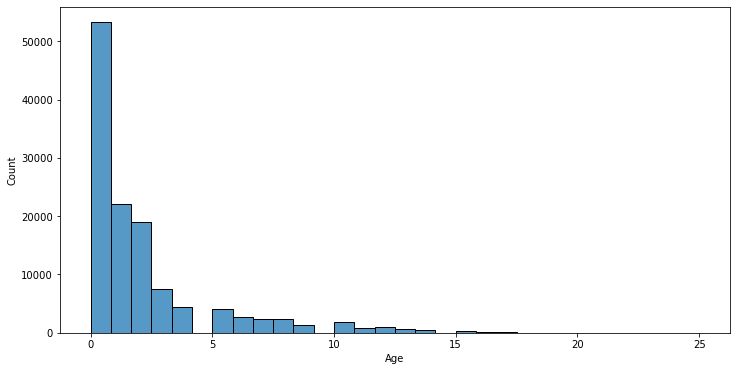

In [15]:
plt.figure(figsize=(12,6))
sns.histplot(new_df['Age upon Outcome'],bins=30)
plt.xlabel("Age")

Text(0.5, 1.0, 'Outcome Type vs. Age')

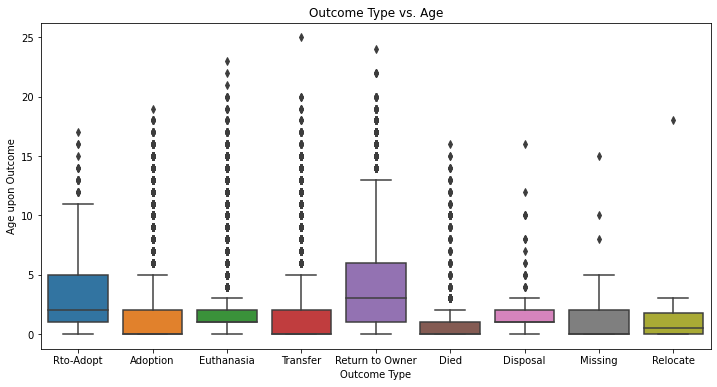

In [16]:
plt.figure(figsize=(12,6))
sns.boxplot(data=new_df, x='Outcome Type', y='Age upon Outcome')
plt.title("Outcome Type vs. Age")

$\;\;\;\;\;\;$ <a class="anchor" id="animals-returned"></a>
## Animals Returned
    - There are animals which have been out once but returned to the shelter again.

In [17]:
total_outcome = df['Animal ID'].count()
total_animal = df['Animal ID'].nunique()
print("\n")
print('Total number of outcomes: ' + str(total_outcome))
print("\n")
print('Total number of animals that have been in the shelter: ' + str(total_animal))
print("\n")



Total number of outcomes: 124491


Total number of animals that have been in the shelter: 111309




In [18]:
outcome_once = df[df.duplicated('Animal ID',keep=False)==False]['Animal ID'].nunique() 
outcome_more = df[df.duplicated('Animal ID',keep=False)]['Animal ID'].nunique() 
print("\n")
print('The number of animals that were out only once: '+ str(outcome_once))
print("\n")
print('The number of animals that were out more than once: '+ str(outcome_more))
print("\n")



The number of animals that were out only once: 101197


The number of animals that were out more than once: 10112




In [19]:
print("\n")
print('The percentage of animals that have come back to the shelter: ' + str(round(outcome_more/total_animal* 100,2)) + '%')
print("\n")



The percentage of animals that have come back to the shelter: 9.08%




In [20]:
# data of outcomes that are not first time
returned = new_df[df.duplicated('Animal ID')] 
returned.shape

(13182, 12)

In [21]:
df[df.duplicated('Animal ID',keep=False)].shape

(23294, 12)

Text(0.5, 1.0, 'Count of Outcome on Age of Animals that have been Returned')

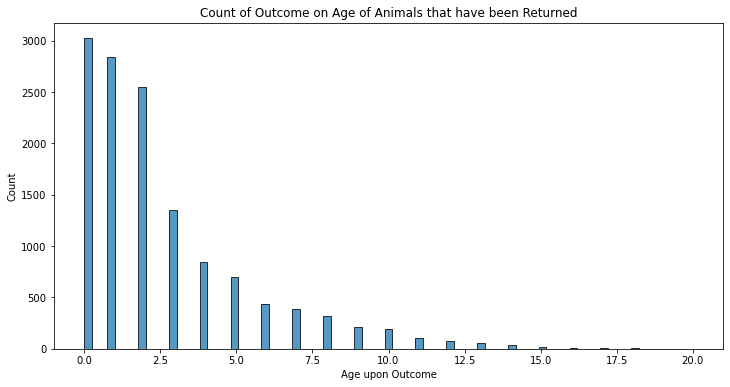

In [22]:
plt.figure(figsize=(12,6))
sns.histplot(returned['Age upon Outcome'])
plt.title('Count of Outcome on Age of Animals that have been Returned')

Text(0.5, 1.0, 'Outcome Type of Returned')

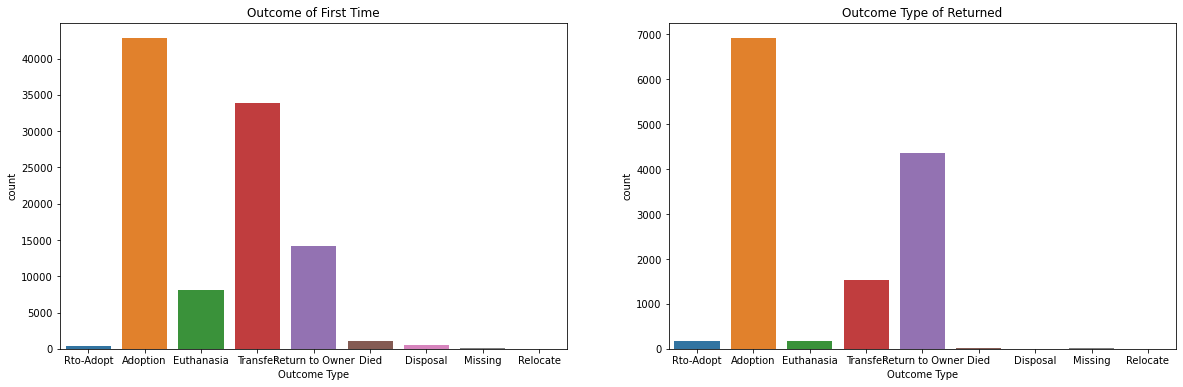

In [23]:
fig, ax =plt.subplots(1,2,figsize=(20,6))
sns.countplot(x=df[df.duplicated('Animal ID',keep=False)==False]['Outcome Type'], ax=ax[0], order=['Rto-Adopt', 'Adoption', 'Euthanasia', 'Transfer',
       'Return to Owner', 'Died', 'Disposal', 'Missing', 'Relocate'])
ax[0].set_title("Outcome of First Time")
sns.countplot(x=returned['Outcome Type'], ax=ax[1], order=['Rto-Adopt', 'Adoption', 'Euthanasia', 'Transfer',
       'Return to Owner', 'Died', 'Disposal', 'Missing', 'Relocate'])
ax[1].set_title("Outcome Type of Returned")

## Location & Time$\;\;\;\;\;\;$ <a class="anchor" id="location+time"></a>

In [24]:
# df['Found Location'].isnull().sum()
# df['Found Location'].nunique()

# street_address = df['Found Location'].apply(lambda location: location.replace(" in ",", ")) # Extract street address

# geolocator = Nominatim(user_agent="geoapi", timeout=100)
# full_address = street_address.apply(geolocator.geocode) # Find full address

# zipcode = full_address.apply(lambda address: address.split().[-2]) # Find zipcodes
# zipcode.nunique()

# Map zipcode

In [25]:
new_df = new_df.drop(['MonthYear','Date of Birth'],axis=1)

In [26]:
new_df["DateTime"] = pd.to_datetime(df["DateTime"]).dt.date

new_df['Year'] = pd.to_datetime(df["DateTime"]).dt.year
new_df['Month'] = pd.to_datetime(df["DateTime"]).dt.month

<AxesSubplot:xlabel='Month,Year'>

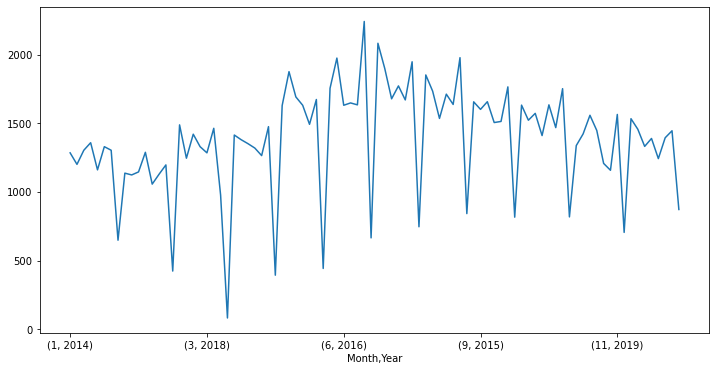

In [27]:
plt.figure(figsize=(12,6))
new_df.groupby(['Month','Year'])['Animal ID'].count().plot()

<AxesSubplot:xlabel='Year', ylabel='count'>

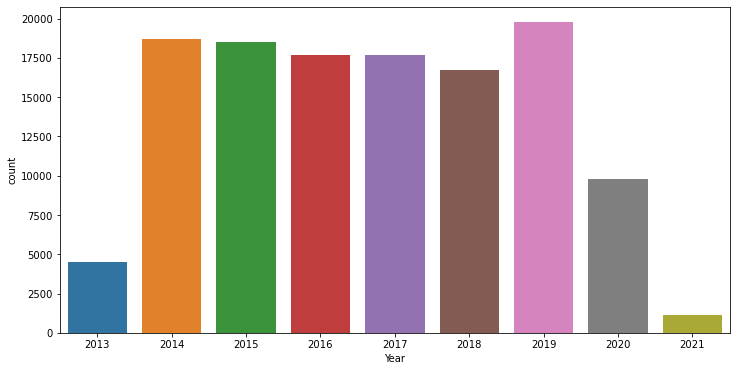

In [28]:
plt.figure(figsize=(12,6))
sns.countplot(data=new_df,x="Year")

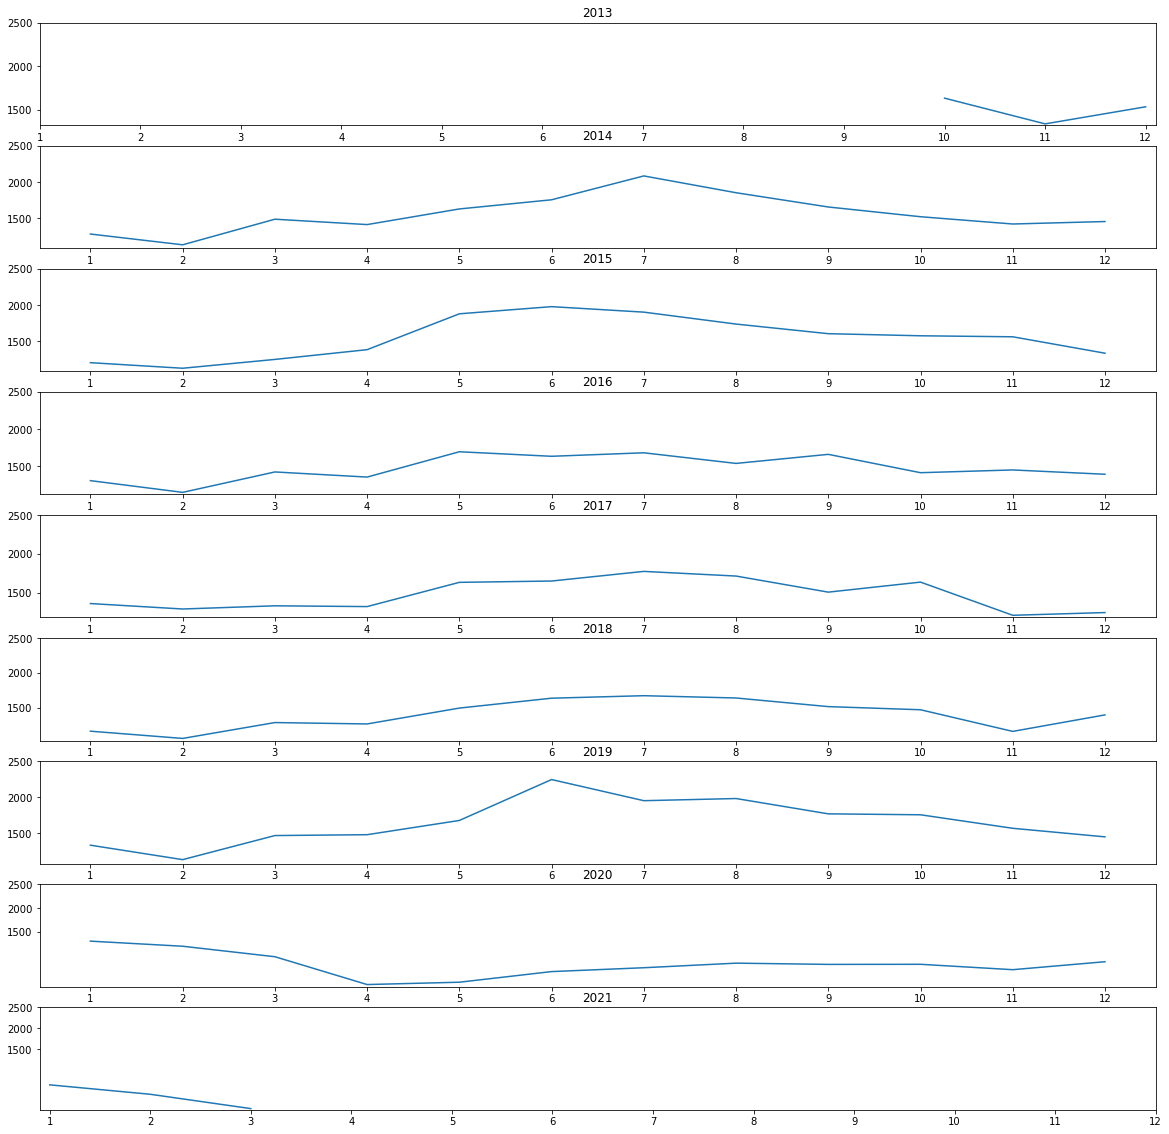

In [29]:
years = sorted(new_df['Year'].unique())

fig, ax = plt.subplots(len(years), 1, figsize=(20,20))

i = 0
for year in sorted(years):
    temp_df = new_df[new_df['Year']==year]
    ax[i].plot(temp_df.groupby('Month')['Animal ID'].count())
    ax[i].set_yticks((1500,2000,2500))
    ax[i].set_xticks(range(1,13))
    ax[i].set_title(year)
    i += 1

* Insight
</b></b>
 * The number of total intakes had decreased steadily from 2104 to 2018, but increased in 2019 sudden manner. (same as intakes)
     -> This might need a further research
 * The number of total intakes decreased exponentially in 2020. (same as intakes)
         -> Covid-19 can be a possible factor. It doesn't mean that the number of animals in need of help decreased. It possibly means that they downsized the operation size of the center.
 * Almost every year, the number of total outcomes increases from Jan. to May and decreases from May to Sep.(same as intakes). However, the line is more gentle than that of intakes.
         -> the number of total outcomes is impacted by school season as well, but it also includes death, enthusaisa, transfer not only adoptions. 

In [30]:
new_df.to_csv("Cleaned_Outcomes.csv")